# **Bellabeat Case Study Using R**
[FitBit Fitness Tracker Data ](https://www.kaggle.com/datasets/arashnic/fitbit)

# **About the Company**

Bellabeat, founded in 2013 by Urška Sršen and Sando Mur, is a rapidly growing high-tech company focused on health-centric smart products for women. With beautifully designed technology, the company gathers data on activity, sleep, stress, and reproductive health to provide personalized insights. Globally expanded, Bellabeat offers a range of products online and emphasizes digital marketing through various channels. Sršen aims to optimize growth opportunities by leveraging consumer data and has tasked the analytics team with analyzing smart device usage for strategic insights."

# **Introduction**
Welcome to the Bellabeat data analysis case study!
In this case study, I simulate working for Bellabeat, a high-tech women's health product manufacturer. 
I performed real-world tasks to address key business questions using the data analysis process: ask, prepare, process, analyze, share, and act.

# ***ASK PHASE***

# **Scenario**

Bellabeat's Chief Creative Officer, Urška Sršen, envisions growth through analyzing smart device fitness data. Assigned to focus on a specific Bellabeat product, my task is to analyze smart device data, extracting consumer usage insights to inform the company's marketing strategy.

# **Questions for Analysis**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# **Business Task**
Analyze smart device usage trends to identify growth opportunities and propose enhancements to the Bellabeat marketing strategy.

# ***PREPARE DATA***

In [1]:
#Loading Packages

library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Importing Data

daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
weight_log_info <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


In [3]:
# Previewing Data

str(daily_activity)
str(weight_log_info)

head(daily_activity)
head(weight_log_info)


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


# ***PROCESS DATA***

In [4]:
# Data Cleaning - Converting datatype 

daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, format = "%m/%d/%Y")
str(daily_activity$ActivityDate)
weight_log_info$Date <- as.POSIXct(weight_log_info$Date, format = "%m/%d/%Y %H:%M:%S")
str(weight_log_info$Date)

 Date[1:940], format: "2016-04-12" "2016-04-13" "2016-04-14" "2016-04-15" "2016-04-16" ...
 POSIXct[1:67], format: "2016-05-02 11:59:59" "2016-05-03 11:59:59" "2016-04-13 01:08:52" ...


In [5]:
head(daily_activity)
head(weight_log_info)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<dttm>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,2016-05-02 11:59:59,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,2016-05-03 11:59:59,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,2016-04-21 11:59:59,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,2016-05-12 11:59:59,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,2016-04-17 11:59:59,72.4,159.6147,25,27.45,True,1.460938e+12


In [6]:
# Checking empty/missing values
missing_values_da <- colSums(is.na(daily_activity))
missing_values_w <- colSums(is.na(weight_log_info))
print(missing_values_da)
print(missing_values_w)

                      Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0 
            Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             65 
           BMI IsManualReport          LogId 
             0              0             

In [7]:
# Checking duplicates
duplicate_entries_da <- daily_activity[duplicated(daily_activity), ]
duplicate_entries_w <- weight_log_info[duplicated(weight_log_info), ]


print(duplicate_entries_da)
print(duplicate_entries_w)

 [1] Id                       ActivityDate             TotalSteps              
 [4] TotalDistance            TrackerDistance          LoggedActivitiesDistance
 [7] VeryActiveDistance       ModeratelyActiveDistance LightActiveDistance     
[10] SedentaryActiveDistance  VeryActiveMinutes        FairlyActiveMinutes     
[13] LightlyActiveMinutes     SedentaryMinutes         Calories                
<0 rows> (or 0-length row.names)
[1] Id             Date           WeightKg       WeightPounds   Fat           
[6] BMI            IsManualReport LogId         
<0 rows> (or 0-length row.names)


# ***ANALYZE***

In [8]:
# Understanding some summary statistics
# Checking unique IDs to identify distinct users in each dataframe.

n_distinct(daily_activity$Id)
n_distinct(weight_log_info$Id)

[1] 33

[1] 8

In [9]:
## Creating a new column named DayOfWeek that contains the day of the week corresponding to each ActivityDate. Used weekdays() function to extract the day of the week.

daily_activity$DayOfWeek <- weekdays(daily_activity$ActivityDate) 

# Group by DayOfWeek to calculate the average steps per day
average_steps_per_day <- daily_activity %>%
  group_by(DayOfWeek) %>%
  summarise(AvgStepsPerDay = mean(TotalSteps))

# Order the days of the week
order_days <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
average_steps_per_day$DayOfWeek <- factor(average_steps_per_day$DayOfWeek, levels = order_days)

# Calculating the overall average steps
overall_average <- mean(average_steps_per_day$AvgStepsPerDay)

head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


In [10]:
## Some quick summary statistics about each data frame

# daily_activity dataframe:
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes,
         Calories) %>%
  summary()



#Analyzing Active Minutes Across Categories in Daily Activity
 daily_activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()



# weight_log_info dataframe
weight_log_info %>%
  select(WeightKg, BMI) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

**Important observations from above summary statistics**

**1. Sedentary Behavior:**
Users spend an average of 991 sedentary minutes daily, around 16 hours, indicating a need for reduced inactivity.

**2. Caloric Burn:**
Users burn an average of 2,304 calories daily, indicating diverse activity levels.

**3. Active minutes across categories**
LightlyActiveMinutes have the highest mean suggests a predominantly light activity level among users.

**4. Weight and BMI:**
Average weight is 72.04 kg with a mean BMI of 25.19, suggesting users, on average, are in the overweight category.



# ***SHARE***

# **Visualization**

`geom_smooth()` using formula = 'y ~ x'


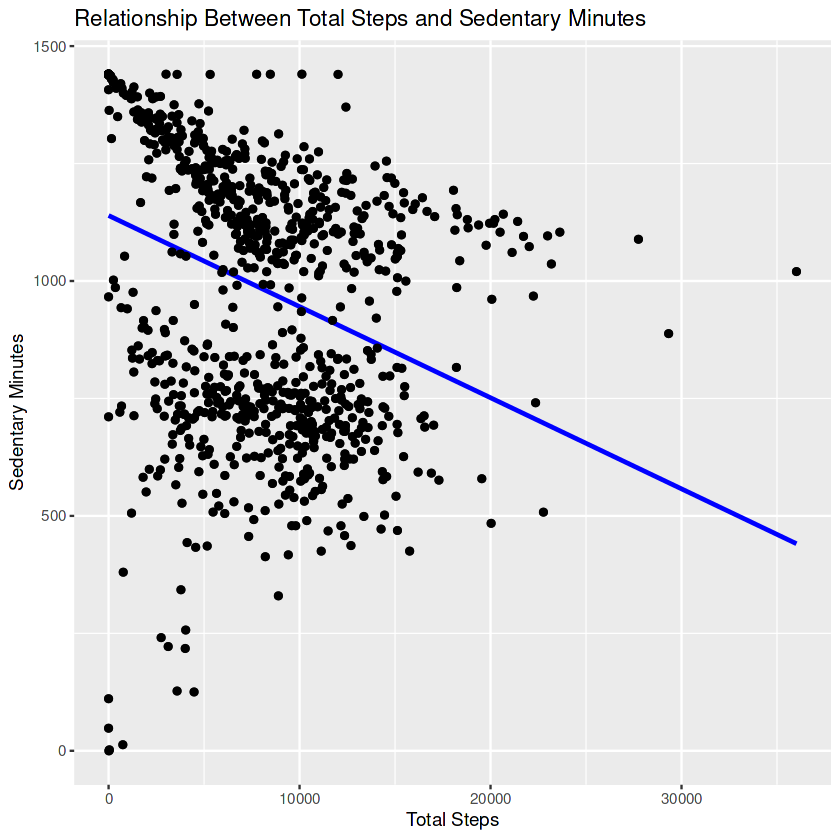

In [11]:
#Relationship Between Total Steps and Sedentary Minutes

ggplot(data = daily_activity, aes(x = TotalSteps, y = SedentaryMinutes)) + 
  geom_point(alpha = 0.8) +  # Adding transparency for better visibility
  geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Adding a linear trend line
  geom_jitter()+
  labs(
    title = "Relationship Between Total Steps and Sedentary Minutes",
    x = "Total Steps",
    y = "Sedentary Minutes"
  ) 

The visualization suggests an inverse relationship: as sedentary minutes increase beyond 500, the number of steps tends to decrease. Notably, individuals with fewer sedentary minutes, especially in the 0-500 range, exhibit higher step counts. This observation implies that users exceeding 500 sedentary minutes might benefit from increased physical activity for improved fitness.

`geom_smooth()` using formula = 'y ~ x'


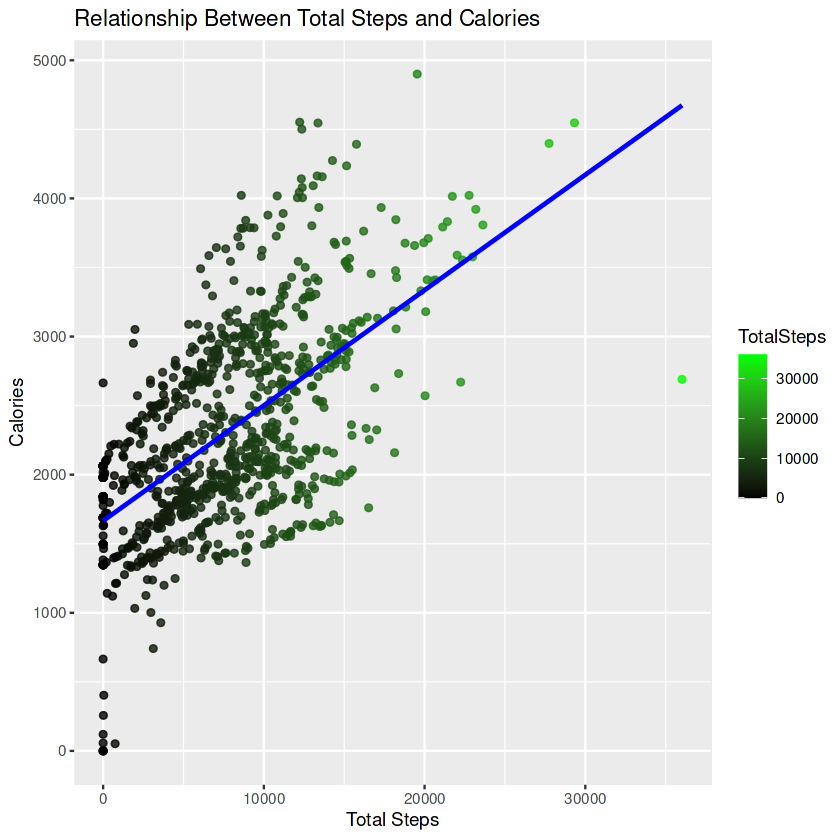

In [12]:
#Relationship Between Total Steps and Calories

ggplot(data = daily_activity, aes(x = TotalSteps, y = Calories, color=TotalSteps)) + 
  geom_point(alpha = 0.8) +  
  geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Adding a linear trend line
  labs(
    title = "Relationship Between Total Steps and Calories",
    x = "Total Steps",
    y = "Calories"
  )+
scale_color_gradient(low = "black", high = "green")  

Visualization indicates a clear positive correlation between Total Steps and Calories : increased physical activity leads to higher calorie expenditure.

In [13]:
## Merging data for further Analysis
combined_data <- merge(daily_activity, weight_log_info, by='Id',all = TRUE)

combined_data %>%
  group_by(BMI) %>%
  summarise(
    TotalSteps = sum(TotalSteps),
    Calories = sum(Calories),
    WeightKg = mean(WeightKg)
  ) %>%
  select(BMI, TotalSteps, Calories, WeightKg)

BMI,TotalSteps,Calories,WeightKg
<dbl>,<int>,<int>,<dbl>
21.45,234229,59426,56.7
21.69,234229,59426,57.3
22.65,751238,112618,52.6
23.82,607278,122886,61.0
23.85,303639,61443,61.1
23.89,1518195,307215,61.2
23.93,303639,61443,61.3
23.96,1518195,307215,61.4
24.00,1518195,307215,61.5


Warning message:
“Removed 693 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 693 rows containing missing values (`geom_point()`).”


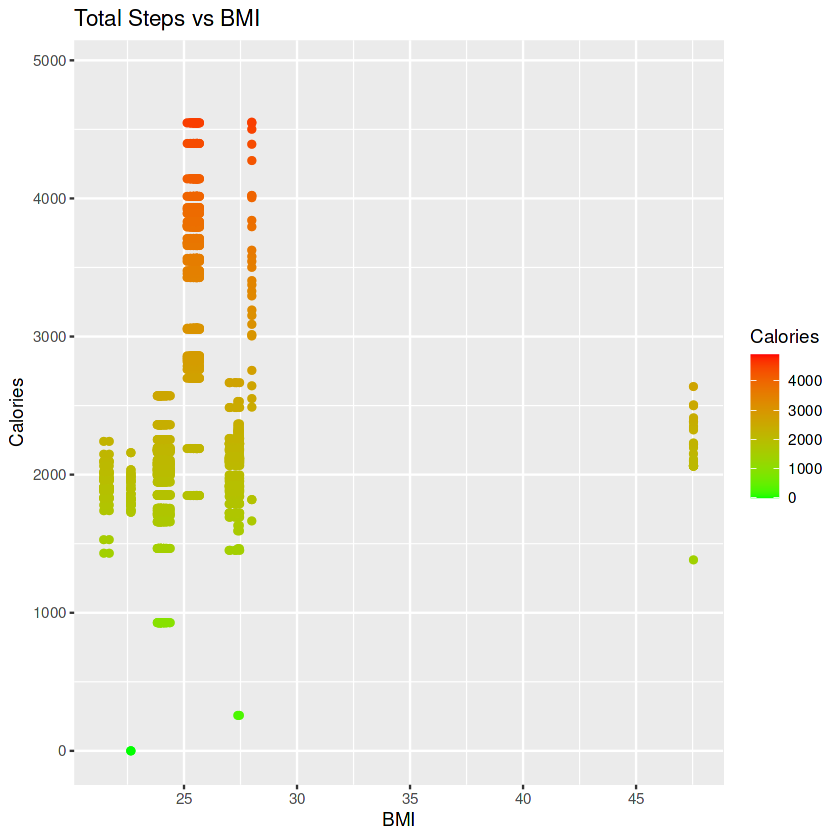

In [14]:
#Relationship Between BMI and Calories

ggplot(combined_data, aes(x = BMI, y = Calories, color=Calories)) +
  geom_point(alpha = 0.5) +
  labs(
    title = "Total Steps vs BMI",
    x = "BMI",
    y = "Calories"
  ) +
 geom_jitter()+
scale_x_continuous(breaks = seq(20, max(combined_data$BMI, na.rm = TRUE), by = 5))+
scale_color_gradient(low = "green", high = "red")  

Observing a positive correlation between calories and BMI, where higher calorie intake corresponds to a higher BMI, suggests a significant proportion of participants fall into the overweight range (BMI > 25). Introducing a feature for BMI calculation to inform personalized diet and recommended daily activity, can enhancing Bellabeat's marketing strategy.

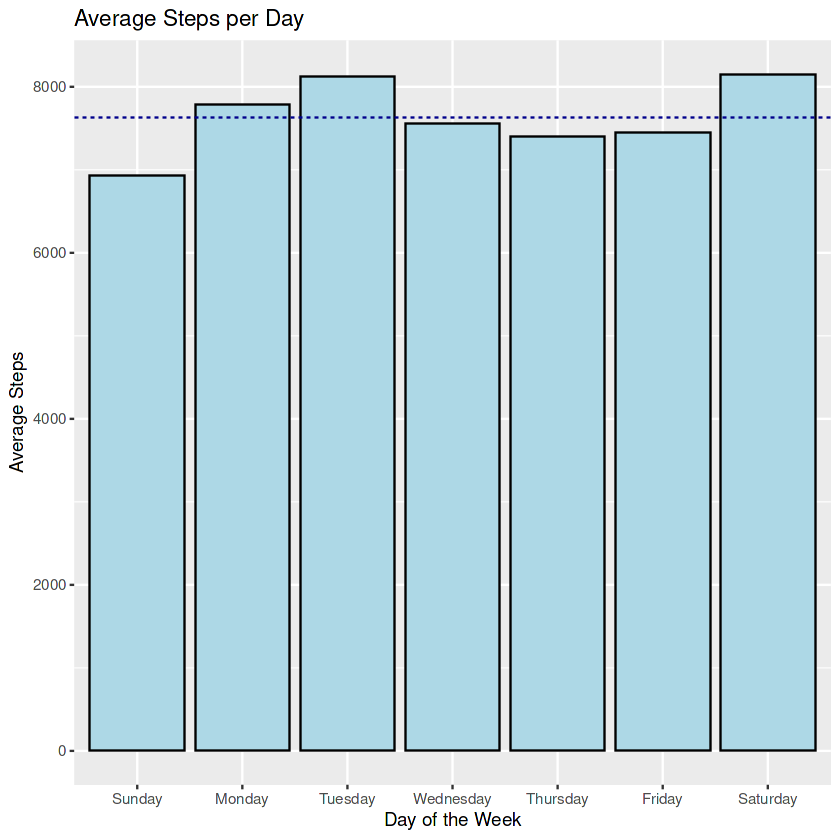

In [15]:
#Relationship Between Average Steps and Day Of The Week
ggplot(average_steps_per_day, aes(x = DayOfWeek, y = AvgStepsPerDay)) +
  geom_bar(stat = "identity", fill = "light blue", color = "black") +
  geom_hline(yintercept = overall_average, linetype = "dashed", color = "dark blue") +
  
  labs(title = "Average Steps per Day",
       x = "Day of the Week",
       y = "Average Steps")

Saturday is the most active day followed by Tuesday. On Sunday, Wednesday, Thursday and Friday people walk below average and are less active. Bellabeat could create midweek and Sunday promotions or challenges to motivate customers to be more active during these days.

# **Analysis Summary**

* Users spend an average of 16 hours daily in sedentary behavior, signaling a need for increased  activity.
* Users burn 2,304 calories daily, indicating diverse activity levels and opportunities for targeted interventions.
* Predominantly light activity levels observed, emphasizing the need for tailored activity recommendations.
* Average weight of 72.04 kg and BMI of 25.19 suggest users, on average, are overweight.
* Inverse relationship observed; users with fewer sedentary minutes exhibit higher step counts.
* Positive correlation between Total Steps and Calories suggests increased activity leads to higher calorie expenditure.
* Positive correlation implies higher calorie intake corresponds to a higher BMI, a significant proportion of participants fall into the overweight range (BMI > 25). Suggesting potential for personalized diet recommendations.
* Saturday and Tuesday are the most active days; opportunities for promotions on less active days.

# **Business Recommendations:**

**1. Promote Active Breaks:**
Introduce reminders or challenges to reduce sedentary behavior, promoting better health outcomes and enhancing user engagement.

**2. Personalized Wellness Plans:**
Offer personalized fitness plans and nutrition advice based on individual caloric needs to elevate the user experience.

**3. Tailored Workout Regimens:**
Develop targeted workout plans, emphasizing a balance of light and moderate activities for improved overall fitness.

**4. Weight Management Support:**
Implement personalized diet recommendations and fitness plans to address weight-related health risks, fostering overall well-being.

**5. Active Lifestyle Incentives:**
Launch promotions or challenges to motivate users, encouraging them to break sedentary habits and adopt healthier lifestyles.

**6. Strategic Fitness Marketing:**
Targeted marketing of fitness-related products or services, aligning with user interests and preferences.

**7. BMI Tracking Features:**
Introduce features for BMI calculation, providing users with tailored diet and activity recommendations for holistic health improvement.

**8. Day-Specific Engagement:**
Design promotions or challenges on less active days to boost user engagement, contributing to sustained company growth and enhancing customer well-being.




***Thank you for your time and interest in my Bellabeat Case Study!***